### **Master Code For Botnet Project**
Push here only after delibrate checking

# Importing Scapy and reading pcap file

In [0]:
!pip install scapy
from scapy.utils import RawPcapReader, rdpcap
from scapy.layers.l2 import Ether
from scapy.layers.dns import DNS, DNSQR
from scapy.layers.inet import IP, TCP, UDP

     |████████████████████████████████| 911kB 4.4MB/s 
  Created wheel for scapy: filename=scapy-2.4.3-py2.py3-none-any.whl size=1043873 sha256=01d01720558cd12acfa29c351e29023f6ff2fc97da4a967a7374f86a8881d132
  Stored in directory: /root/.cache/pip/wheels/95/bf/51/905b3e84ec4ca910ce4ae92173c7334623105a265bdd1d9438
Successfully built scapy


### Prepare PyGDrive

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Pcap file name goes here

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

## Mount GDrive

In [0]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Reading PCAP file using RDPCAP

In [0]:
# link of the mixed before infection file in first folder
%%time
pcap_file_name = '/content/drive/My Drive/Botnet Dataset/CTU DATASET/CTU MIXED CAPTURES/CTU_Mixed_Capture_1/2015-07-28_mixed.before.infection.pcap'
print('All okay in initialisation')
print ('Reading File, May take some time....Please wait')
pcap_file = rdpcap(pcap_file_name)
print(pcap_file)
print('Go Ahead...')

All okay in initialisation
Reading File, May take some time....Please wait
<2015-07-28_mixed.before.infection.pcap: TCP:482313 UDP:51629 ICMP:570 Other:6532>
Go Ahead...
CPU times: user 2min 38s, sys: 5.06 s, total: 2min 43s
Wall time: 2min 44s


#Streams

DNS and Total Streams

In [0]:
%%time
#pcap_streams = pcap_file.sessions(full_duplex) # extracting Sesison (Bidirectional)
pcap_streams = pcap_file.sessions() # extracting flows (Unidirectiuonal)

dns_count = 0
dnsPortNo_matchPattern = ':53 '
for stream_name in pcap_streams.keys():
    if dnsPortNo_matchPattern in (stream_name + " "):
        dns_count += 1
        
print (f'{len (pcap_streams)} Total flows and {dns_count} DNS Flows in given PCAP file')

24340 Total flows and 12871 DNS Flows in given PCAP file
CPU times: user 33.4 s, sys: 17.6 ms, total: 33.4 s
Wall time: 33.5 s


In [0]:
class MyFlow:
    def __init__(self, startTime, endTime, srcIP, srcPort, destIP, destPort, pktCount=0, protocol="NA" ):
        self.startTime = startTime
        self.endTime = endTime
        self.srcIP = srcIP
        self.srcPort = srcPort
        self.destIP = destIP
        self.destPort = destPort
        self.pktCount = pktCount
        self.protocol = protocol

class MyFlowDictValueObject:
    def __init__ (self, startTime, endTime, pktCount):
        self.startTime = startTime
        self.endTime = endTime
        self.pktCount = pktCount


In [0]:
#from scapy.all import *

Manual DNS Streams : SNIFFING METHOD / RAWPCAP READER

In [0]:
%%time
i = 0   #pkt count

flow_dict={}
#dns_count = 0

for (pkt_data, pkt_metadata ) in RawPcapReader(pcap_file_name):
    frm = Ether(pkt_data)
    i += 1  # Pkt counter
    #if i == 2000:
    #    break
    if not (IP and TCP and UDP ) in frm:
        key_string = "Other Flow at Packet " + str(i)
        flow_dict[key_string] = 0     # 0 depicts that the flow is not counted
        continue

    try:
        pktTime = (str(pkt_metadata.sec) +'.' + str(pkt_metadata.usec))
        key_string = str(str(frm[IP].src)+ ' ' + str(frm[UDP].sport) + ' ' + str(frm[IP].dst) + ' ' +  str(frm[UDP].dport))
        if DNS in frm :          #no flow info being extracted here
            key_string = "DNS " + key_string
           
        if key_string in flow_dict.keys():
            flow_dict[key_string].endTime = pktTime
            flow_dict[key_string].pktCount += 1
        else:
            tempFlow = MyFlowDictValueObject(pktTime, pktTime, 1)
            flow_dict[key_string] = tempFlow
    except:
        print (f'Exception at pkt no {i}')


#print(f'{dns_count} DNS pkts from total {i} pkts')    #total DNS pkts found
print (f'{len(flow_dict)} TOTAL FLOWS') 

dnsFilteredList = list(filter(lambda x:x.startswith("DNS"),flow_dict.keys()))
print (f'{len(dnsFilteredList)} DNS FLOWS') 


#for a,b in dns_data.items():                    #Display manual streams
#    print(a,b)   

504777 TOTAL FLOWS
12872 DNS FLOWS
CPU times: user 2min 22s, sys: 480 ms, total: 2min 23s
Wall time: 2min 23s


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [0]:
dnsFilteredList = list(filter(lambda x:x.startswith("Other"),flow_dict.keys()))
print (f'{len(dnsFilteredList)} Good FLOWS (ignoring 0s)') 

60327 Good FLOWS (ignoring 0s)


In [0]:
len(flow_dict)

70605

In [0]:
flow_dict

{'Other Flow at Packet 1': 0,
 'Other Flow at Packet 2': 0,
 'Other Flow at Packet 3': 0,
 'Other Flow at Packet 4': 0,
 'Other Flow at Packet 5': 0,
 'Other Flow at Packet 6': 0,
 'Other Flow at Packet 7': 0,
 'Other Flow at Packet 8': 0,
 'Other Flow at Packet 9': 0,
 'Other Flow at Packet 10': 0,
 'Other Flow at Packet 11': 0,
 'Other Flow at Packet 12': 0,
 'Other Flow at Packet 13': 0,
 'DNS 10.0.0.45 5353 224.0.0.251 5353': <__main__.MyFlowDictValueObject at 0x7fefb22fddd8>,
 'Other Flow at Packet 16': 0,
 'Other Flow at Packet 17': 0,
 'Other Flow at Packet 18': 0,
 'Other Flow at Packet 33': 0,
 'Other Flow at Packet 34': 0,
 'Other Flow at Packet 35': 0,
 'Other Flow at Packet 38': 0,
 'Other Flow at Packet 39': 0,
 'Other Flow at Packet 40': 0,
 'Other Flow at Packet 51': 0,
 'Other Flow at Packet 52': 0,
 'Other Flow at Packet 53': 0,
 '10.0.0.45 68 255.255.255.255 67': <__main__.MyFlowDictValueObject at 0x7fefb22fd7f0>,
 'Other Flow at Packet 58': 0,
 'Other Flow at Packet 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### DNS metadata for later analysis
    Packet number, Time Stamp, Source IP, Source Port, Dest IP, Dest Port, 
    DNS query/reply, Txn id, Query Name



In [0]:
%%time 
i = 0   #pkt count
dns_extract=[]
count = 0
for (pkt_data, pkt_metadata) in RawPcapReader(pcap_file_name):
    pkt2 = Ether(pkt_data)
    i += 1
    try:
        if DNS in pkt2 :          #no flow info being extracted here
            time = (str(pkt_metadata.sec) +'.' + str(pkt_metadata.usec))
            dns_extract.append(([i, float(time), (pkt2[IP].src), pkt2[UDP].sport, 
                             pkt2[IP].dst, pkt2[UDP].dport, pkt2[DNS].qr, 
                             pkt2[DNS].id, pkt2[DNSQR].qname]))            
            count += 1
            #print (type(i), type(time), type(pkt2[IP].src), type(pkt2[UDP].sport), type(pkt2[DNSQR].qname))
    except:
        print('error in pkt no: ', i)

#print (dns_data)                                 #List containing required data 
print(f'{count} DNS pkts from total {i} pkts')    #total DNS pkts found


error in pkt no:  27
error in pkt no:  28
error in pkt no:  29
error in pkt no:  30
error in pkt no:  36
error in pkt no:  37
error in pkt no:  41
error in pkt no:  42
error in pkt no:  45
error in pkt no:  46
error in pkt no:  47
error in pkt no:  48
error in pkt no:  54
error in pkt no:  55
error in pkt no:  95
error in pkt no:  96
error in pkt no:  108951
error in pkt no:  109083
error in pkt no:  110216
error in pkt no:  110383
error in pkt no:  113221
error in pkt no:  259844
error in pkt no:  268112
error in pkt no:  268201
error in pkt no:  268428
error in pkt no:  292579
error in pkt no:  296821
error in pkt no:  297540
error in pkt no:  298165
error in pkt no:  298435
error in pkt no:  299847
error in pkt no:  300923
error in pkt no:  301249
error in pkt no:  301382
error in pkt no:  301431
error in pkt no:  302588
error in pkt no:  311124
error in pkt no:  320045
error in pkt no:  324289
error in pkt no:  330478
error in pkt no:  332082
error in pkt no:  335164
error in pkt n

# Extraction

Download txt file for sessions

In [0]:
from google.colab import files
file_name = input(str('Enter file name: '))
file_name += '.txt'
my_file = open(file_name,'w')

file_dnld = 'Session, No of pkts\n'

for i,j in pcap_streams.items():
    file_dnld += str(i)+ str(',') + str(j) + str(',\n')
print (file_dnld)

my_file.write(file_dnld)
my_file.close()

files.download(file_name)
#print('Write Complete') 

Enter file name: 11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download txt file for pcap metadata

In [0]:
from google.colab import files
file_name = input(str('Enter file name: '))
file_name += '.txt'
my_file = open(file_name,'w')

file_dnld = 'Pkt number, Time Stamp, Source IP, Source Port, Dest IP, Dest Port, DNS query/reply, Txn id, Query Name\n'
            
for i in range(len(dns_extract)):
    for j in range(9):
        file_dnld += str(dns_extract[i][j])
        file_dnld += ','
    file_dnld += '\n'   
my_file.write(file_dnld)
my_file.close()

files.download(file_name)
print('Write Complete') 

Enter file name: 12
Write Complete


# Plotting

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(24,8))

'time' as captured on wire
, 'new_time' normalised from '0'

In [0]:
num,time,a2,a3,a4,a5,a6,a7,name = zip(*dns_extract)
new_time = list(map(lambda x: x - time[0], time))
print (max(new_time), new_time)

74758.86760807037 [0.0, 2.4080276489257812e-05, 0.42002201080322266, 0.4200570583343506, 0.6700880527496338, 0.6701240539550781, 0.9163379669189453, 0.9163720607757568, 1.0214829444885254, 1.021517038345337, 4.0886101722717285, 4.088646173477173, 13.707348108291626, 13.707607984542847, 40.287091970443726, 40.28712511062622, 121.45834803581238, 121.45837903022766, 129.92469000816345, 129.94715905189514, 130.00950813293457, 130.01042699813843, 130.05173707008362, 130.05258703231812, 130.10939812660217, 130.11256909370422, 130.11693811416626, 130.119637966156, 130.45137810707092, 130.46140813827515, 130.61657810211182, 130.62629795074463, 131.1286280155182, 130.2934639453888, 134.34051609039307, 134.42400002479553, 134.42506194114685, 134.52046608924866, 134.52383017539978, 134.6090910434723, 134.61010909080505, 134.6990361213684, 135.0509181022644, 135.14074516296387, 135.14155507087708, 135.7848081588745, 135.80944800376892, 135.32978796958923, 135.33080005645752, 135.40351009368896, 14

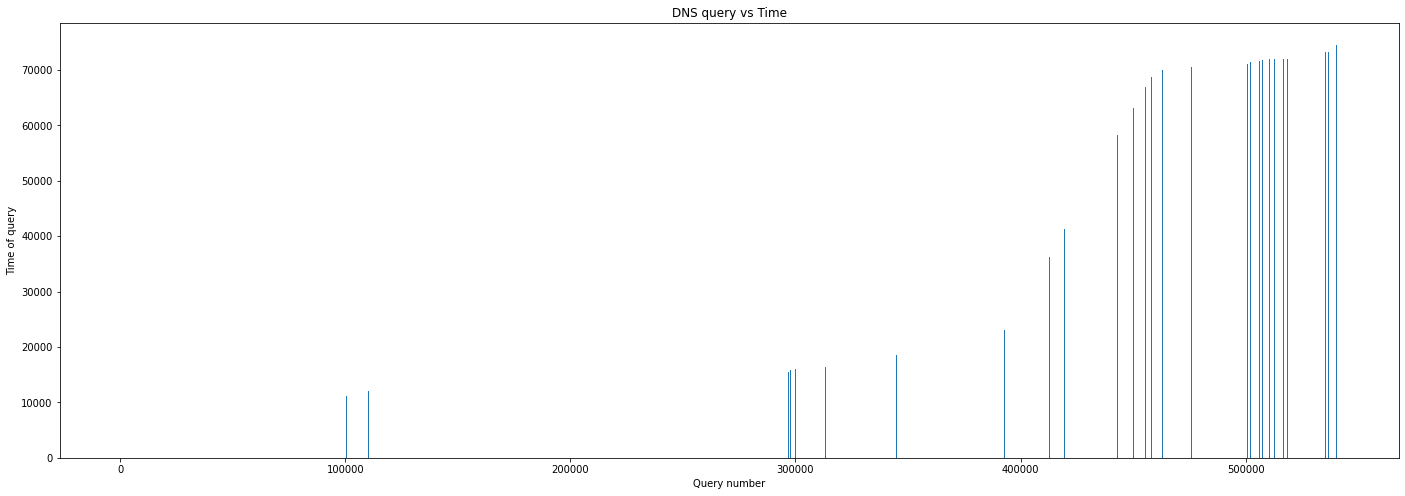

In [0]:
plt.bar(num,new_time)
plt.xlabel('Query number')
plt.ylabel('Time of query')
plt.title('DNS query vs Time')
#plt.yscale('log')
plt.show()

Instead of taking abs time, we take delta time(time between queries) to aid in establishing thresholds at a later stage
Delta Time (y-axis) Query(x-axis)


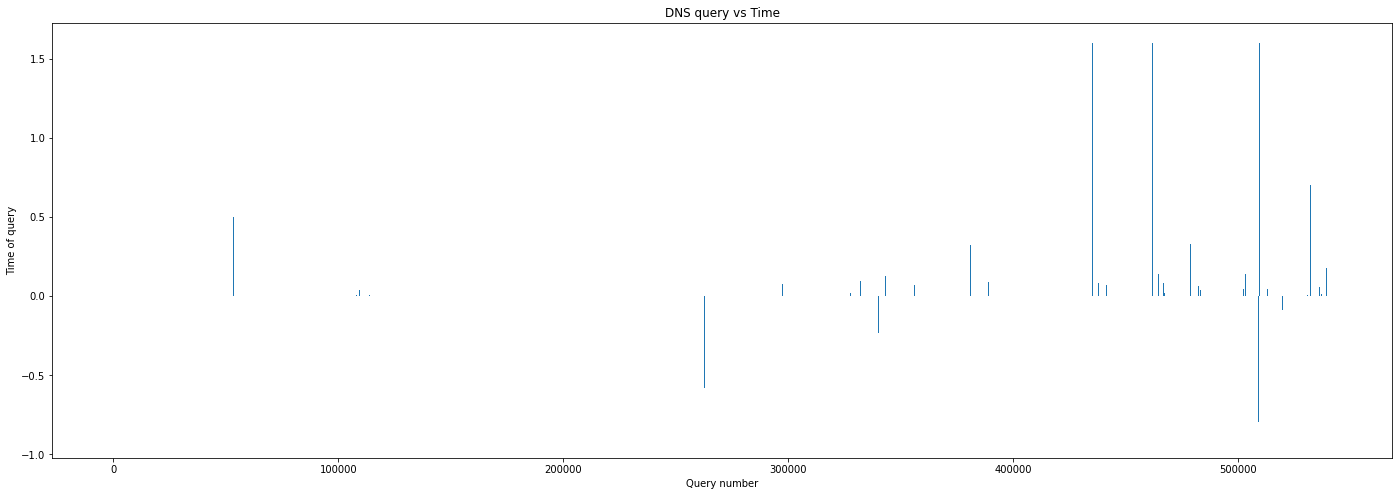

In [0]:
#@title Max Delta Time Slider
dtime=[0]
for i in range(len(dns_extract) -1):
    t1 = dns_extract[i+1][1] - dns_extract[i][1]
    limit = 6.501 #@param {type:"slider", min:0.001, max:100, step:0.1}
    if t1 > limit:
        t1 = limit
    dtime.append(t1)

plt.bar(num,dtime)
plt.xlabel('Query number')
plt.ylabel('Time of query')
plt.title('DNS query vs Time')
#plt.yscale('log')
plt.show()

## DNS queries in a certain block of time

Setting the block size for better tables


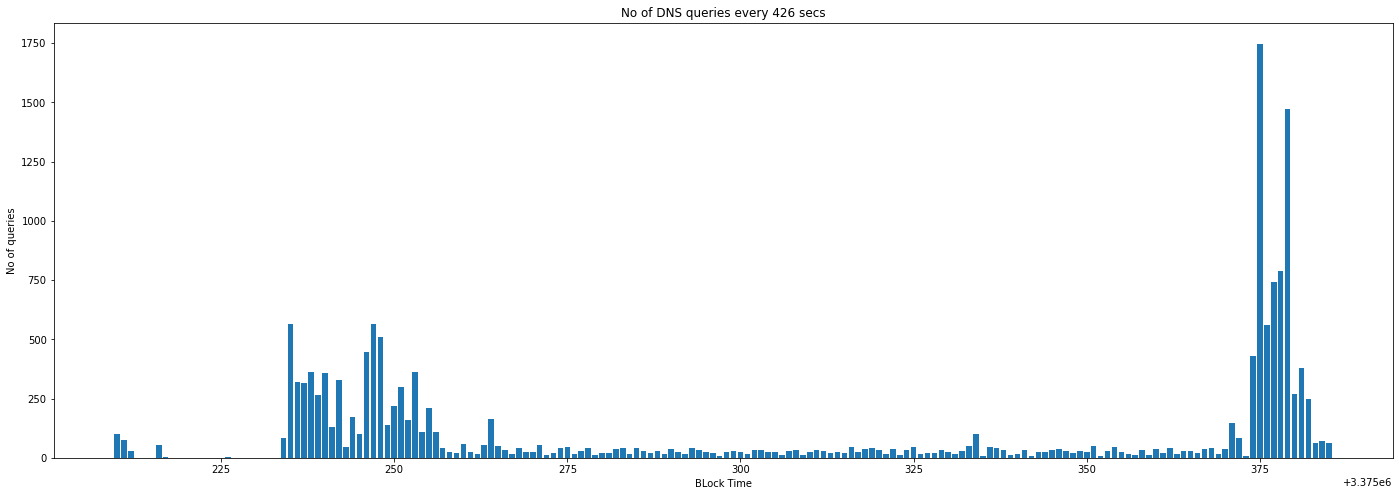

In [0]:
#@title DNS pkts per block size of _____ secs 

time_blocks= []
time_step = 426 #@param {type:"slider", min:1, max:5000, step:1}
for i in time:
    time_blocks.append(float(i)//time_step)

dict = {}
for i in time_blocks:
    if i in dict.keys():
        dict[i] = dict[i] + 1
    else:
        dict[i] = 1

block_time, no_pcap = zip(*dict.items())
#print (dict)
#print (time_pcap)
#print (no_pcap)

plt.bar(block_time,no_pcap)
plt.xlabel('BLock Time')
plt.ylabel('No of queries')
plt.title(f'No of DNS queries every {time_step} secs')
plt.show()